In [1]:
# %reload_ext autoreload
# %autoreload 2

from chem import rosenbrock
from chem import script7
import matplotlib.pyplot as plt
import numpy as np

# Basic Hamiltonian Dynamics on the Rosenbrock function

In [2]:
initial_state = np.concatenate([np.array([-0.5, -0.5]), np.random.randn(2)])
traj = script7.velocity_verlet(initial_state, 1000, 0.005, rosenbrock.rosenbrock_force)

/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/mcmc/src/chem/rosenbrock.py:43: RuntimeWarning: overflow encountered in scalar multiply
  [-2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0] ** 2), 200 * (x[1] - x[0] ** 2)]
/Users/zuoming/Library/CloudStorage/OneDrive-CornellUniversity/Chem7870/Computational Chemistry/mcmc/src/chem/velocity_verlet.py:89: RuntimeWarning: invalid value encountered in add
  v = v_half + 0.5 * dt * a_new


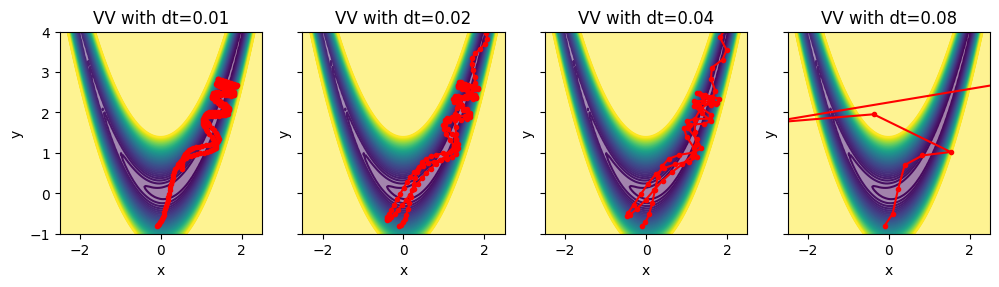

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

np.random.seed(0)
n_steps_verlet = 200
v_init = np.random.randn(2)
x_init = np.array([-.1, -.8])
initial_state = np.concatenate([x_init, v_init])

dts = [0.01, 0.02, 0.04, 0.08]
for i, dt in enumerate(dts):
    ax = axes[i]
    traj = script7.velocity_verlet(initial_state, n_steps_verlet, dt, rosenbrock.rosenbrock_force)
    rosenbrock.plot_rosenbrock_in_2D(ax)
    ax.plot(traj[:, 0], traj[:, 1], 'r-', marker='.')
    ax.set_title(f'VV with dt={dt}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')


# Comparing Metropolis and Hamiltonian Monte Carlo on the Rosenbrock

## Metropolis Monte Carlo with Gaussian proposal

[34.015      32.63957421 33.12977246 33.37100337]
[34.015      21.87788274 21.87788274 21.87788274]
[34.015       5.95184544  5.95184544  5.95184544]
[34.015 34.015 34.015 34.015]


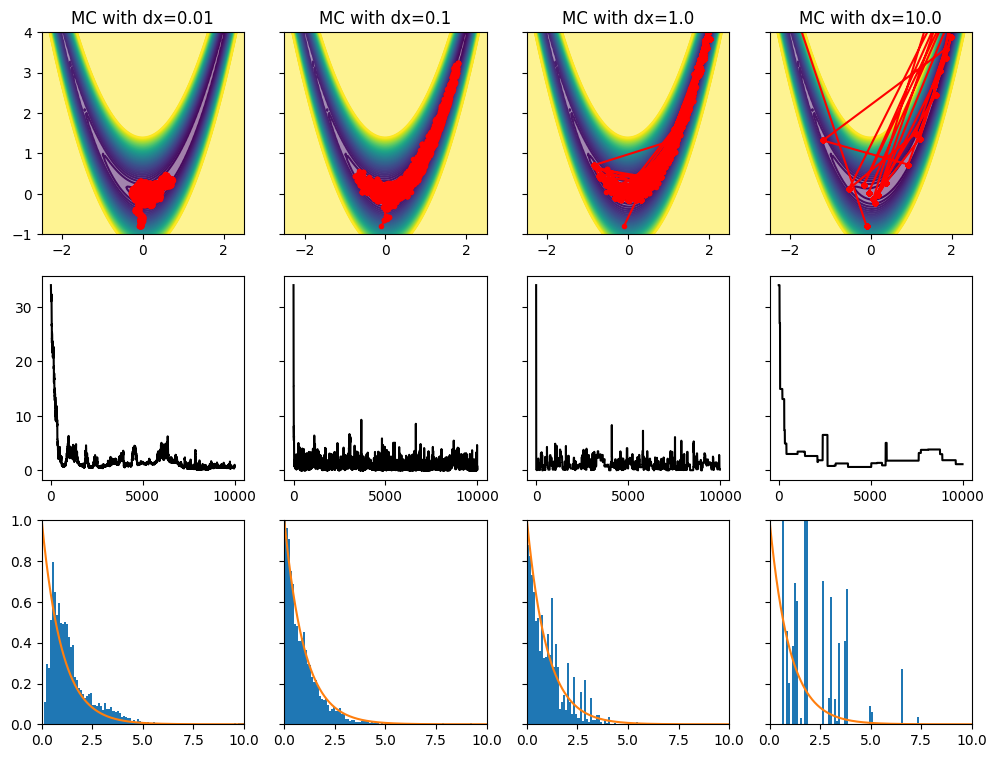

In [4]:
n_steps = 10000

stepsizes = [0.01, 0.1, 1.0, 10.0]
fig, axes = plt.subplots(3, len(stepsizes), figsize=(len(stepsizes) * 3, 9), sharex='row', sharey='row')
for ax in axes[0]:
    rosenbrock.plot_rosenbrock_in_2D(ax)

for i, dx in enumerate(stepsizes):
    np.random.seed(0)
    ax = axes[0, i]
    mc = script7.GaussianMetropolisMC(rosenbrock.rosenbrock_function, dx)
    traj_metropolis, e_metropolis = mc.sample_trajectory(x_init, n_steps)
    ax.plot(traj_metropolis[:, 0], traj_metropolis[:, 1], 'r-', marker='.')
    ax.set_title(f'MC with dx={dx}')
    print(e_metropolis[:4])
    axes[1, i].plot(e_metropolis, c='k')
    axes[2, i].hist(e_metropolis, bins=100, density=True, range=(0,10.))
    xax = np.linspace(0, 10, 1001)
    axes[2, i].plot(xax, np.exp(-xax))
    axes[2, i].set_ylim(0, 1.0)
    axes[2, i].set_xlim(0, 10)

[34.015      32.3047456  32.47113078 32.39198982]
[34.015      27.19877882 26.49890805 25.28381239]
[34.015       3.84425109  4.2829161   2.95461711]
[34.015      34.015       3.04279483  3.04279483]
[34.015 34.015 34.015 34.015]


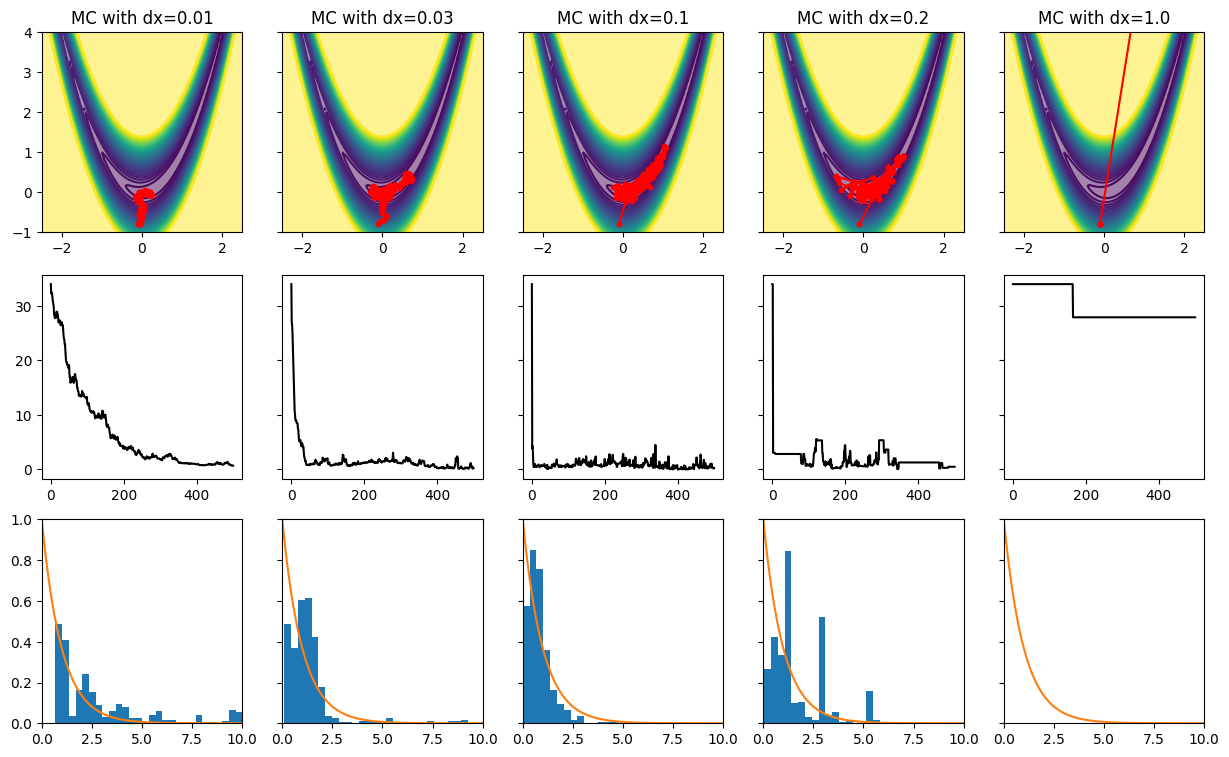

In [5]:
n_steps_proposal = 20
nsteps_ham = n_steps // n_steps_proposal

stepsizes = [0.01, 0.03, 0.1, 0.2, 1.0]
fig, axes = plt.subplots(3, len(stepsizes), figsize=(len(stepsizes) * 3, 9), sharex='row', sharey='row')
for ax in axes[0]:
    rosenbrock.plot_rosenbrock_in_2D(ax)

for i, dx in enumerate(stepsizes):
    np.random.seed(0)
    ax = axes[0, i]
    mc = script7.HamiltonianMC(rosenbrock.rosenbrock_function,
                            rosenbrock.rosenbrock_force,
                            dx,
                            n_steps_proposal=10)
    traj_metropolis, e_metropolis = mc.sample_trajectory(x_init, nsteps_ham)
    ax.plot(traj_metropolis[:, 0], traj_metropolis[:, 1], 'r-', marker='.')
    ax.set_title(f'MC with dx={dx}')
    print(e_metropolis[:4])
    axes[1, i].plot(e_metropolis, c='k')
    axes[2, i].hist(e_metropolis, bins=100, density=True)
    xax = np.linspace(0, 10, 1001)
    axes[2, i].plot(xax, np.exp(-xax))
    axes[2, i].set_ylim(0, 1.0)
    axes[2, i].set_xlim(0, 10)

In [6]:
mc.dt

1.0